<a href="https://colab.research.google.com/github/tuxlimr/Celery_Preprocessing/blob/master/TimeSeries_in_BankNifty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
stock =  yf.download("^NSEBANK", period="5y")

[*********************100%%**********************]  1 of 1 completed


In [3]:
stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-29,24647.949219,25023.750000,24404.550781,24959.699219,24959.408203,0
2018-10-30,24924.750000,25121.500000,24686.849609,24807.750000,24807.460938,0
2018-10-31,24823.800781,25201.300781,24528.349609,25153.250000,25152.957031,0
2018-11-01,25285.199219,25401.599609,25129.449219,25323.650391,25323.355469,0
2018-11-02,25545.349609,25856.250000,25499.150391,25701.650391,25701.351562,0
...,...,...,...,...,...,...
2023-10-20,43584.250000,43877.500000,43567.449219,43723.050781,43723.050781,152400
2023-10-23,43822.699219,43831.300781,43029.449219,43151.199219,43151.199219,201400
2023-10-25,43308.300781,43397.449219,42758.398438,42832.000000,42832.000000,188300


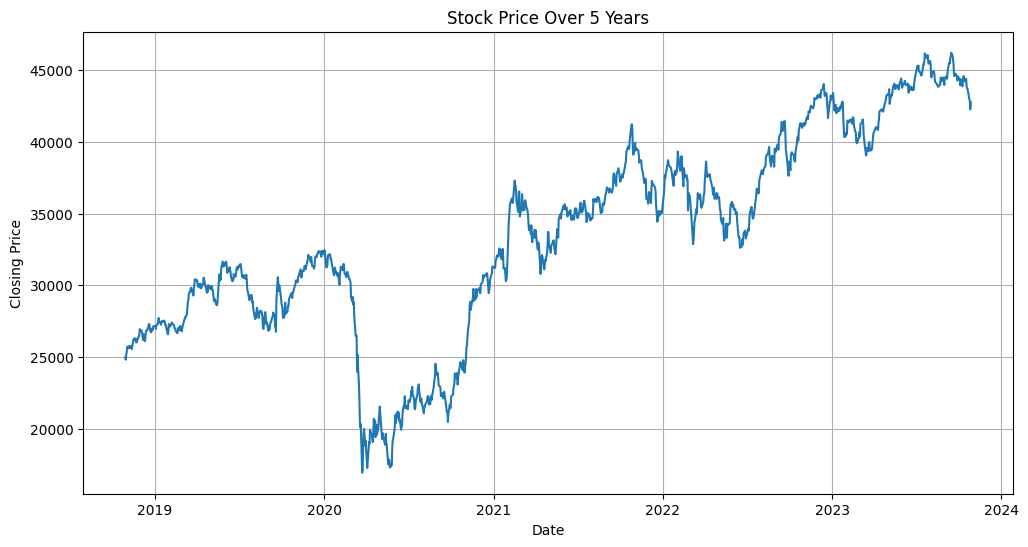

In [4]:
# Plot the closing price to observe seasonality
plt.figure(figsize=(12, 6))
plt.plot(stock['Close'])
plt.title('Stock Price Over 5 Years')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid()
plt.show()

### Box plot and interquartile range

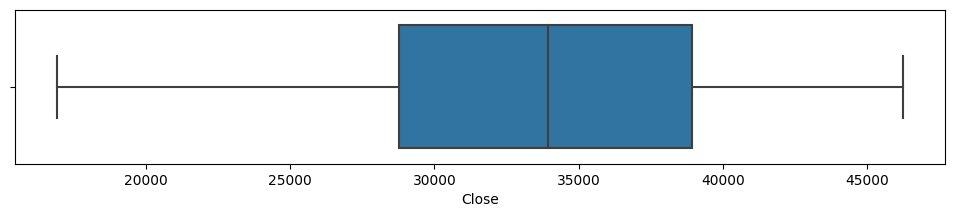

In [5]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=stock['Close'],whis=1.5)

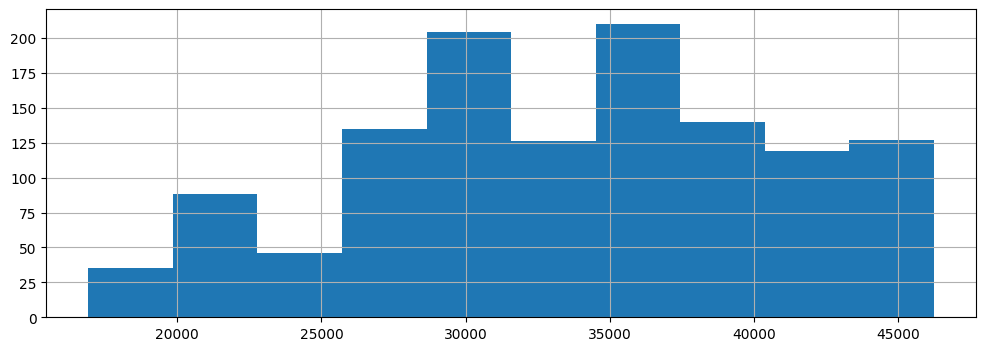

In [6]:
fig = stock.Close.hist(figsize = (12,4))

### Use Linear Interpolation

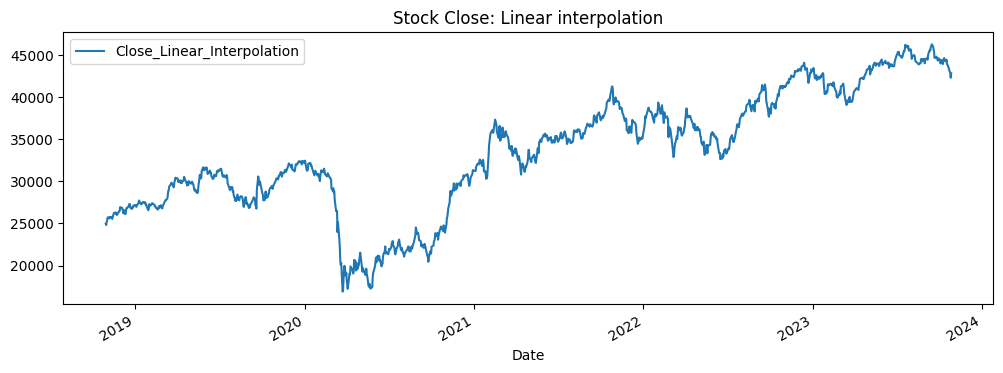

In [7]:
stock = stock.assign(Close_Linear_Interpolation=stock.Close.interpolate(method='linear'))
stock[['Close_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Stock Close: Linear interpolation')
plt.show(block=False)

In [8]:
stock['Close'] = stock['Close_Linear_Interpolation']
stock.drop(columns=['Close_Linear_Interpolation'],inplace=True)

### Time Series decomposition

In [9]:
### Additive seasonal decomposition

In [10]:
stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-29,24647.949219,25023.750000,24404.550781,24959.699219,24959.408203,0
2018-10-30,24924.750000,25121.500000,24686.849609,24807.750000,24807.460938,0
2018-10-31,24823.800781,25201.300781,24528.349609,25153.250000,25152.957031,0
2018-11-01,25285.199219,25401.599609,25129.449219,25323.650391,25323.355469,0
2018-11-02,25545.349609,25856.250000,25499.150391,25701.650391,25701.351562,0
...,...,...,...,...,...,...
2023-10-20,43584.250000,43877.500000,43567.449219,43723.050781,43723.050781,152400
2023-10-23,43822.699219,43831.300781,43029.449219,43151.199219,43151.199219,201400
2023-10-25,43308.300781,43397.449219,42758.398438,42832.000000,42832.000000,188300


[*********************100%%**********************]  1 of 1 completed


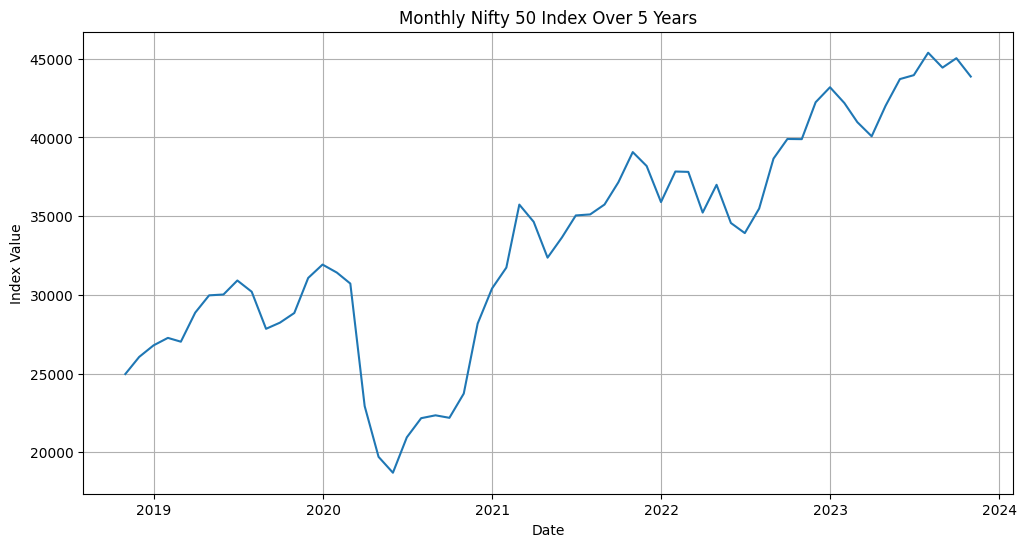

In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Ticker symbol for Nifty 50 index
nifty_ticker = "^NSEBANK"

# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="5y")

# Resample the data on a monthly basis to observe seasonality
monthly_data = data['Close'].resample('M').mean()

# Plot the monthly index values to observe seasonality
plt.figure(figsize=(12, 6))
plt.plot(monthly_data)
plt.title('Monthly Nifty 50 Index Over 5 Years')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid()
plt.show()


[*********************100%%**********************]  1 of 1 completed


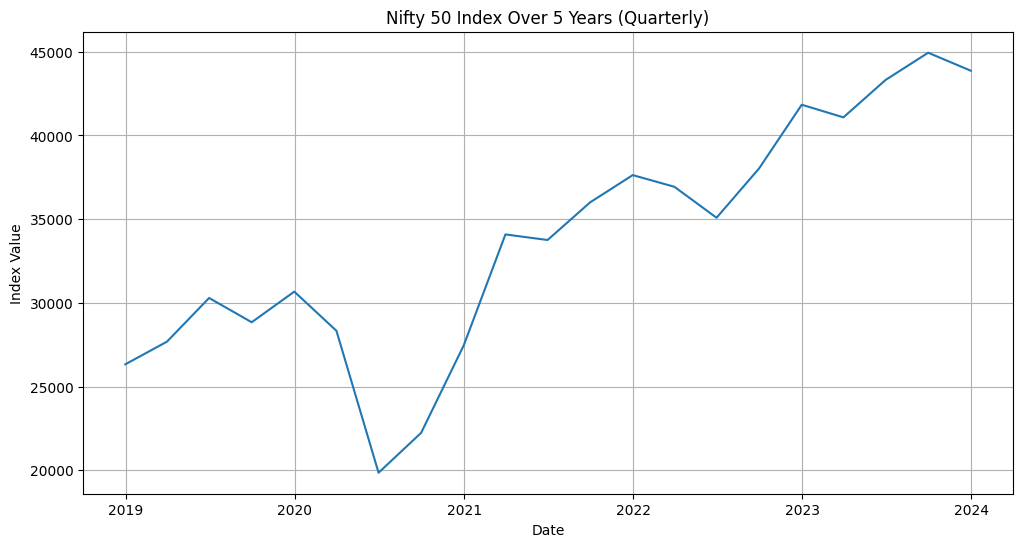

In [12]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Ticker symbol for Nifty 50 index
nifty_ticker = "^NSEBANK"


# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="5y")

# Resample the data on a quarterly basis to observe seasonality
quarterly_data = data['Close'].resample('Q').mean()

# Plot the quarterly index values to observe seasonality
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data)
plt.title('Nifty 50 Index Over 5 Years (Quarterly)')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid()
plt.show()


[*********************100%%**********************]  1 of 1 completed


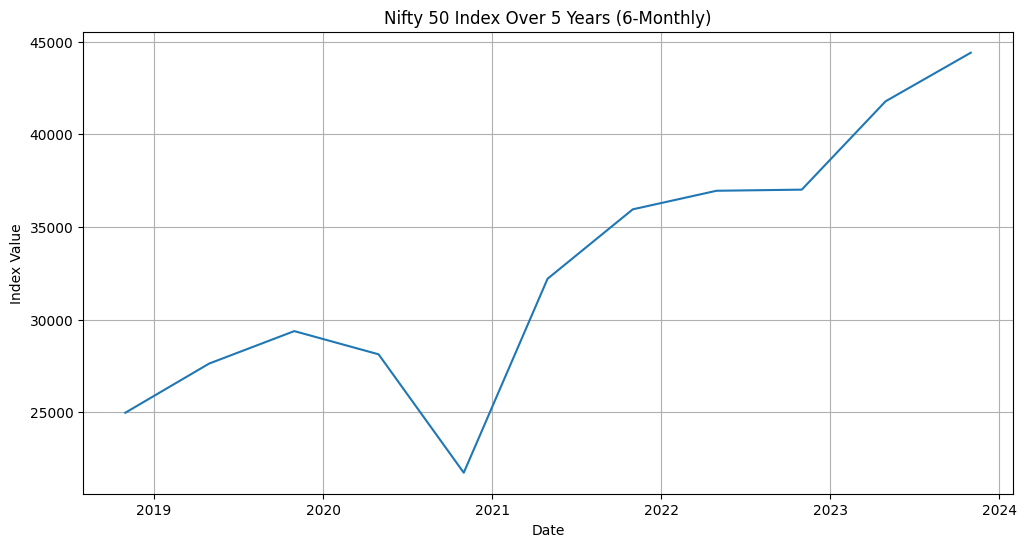

In [13]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Ticker symbol for Nifty 50 index
nifty_ticker = "^NSEBANK"

# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="5y")

# Resample the data on a 6-month basis to observe seasonality
six_monthly_data = data['Close'].resample('6M').mean()

# Plot the 6-month index values to observe seasonality
plt.figure(figsize=(12, 6))
plt.plot(six_monthly_data)
plt.title('Nifty 50 Index Over 5 Years (6-Monthly)')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid()
plt.show()


[*********************100%%**********************]  1 of 1 completed


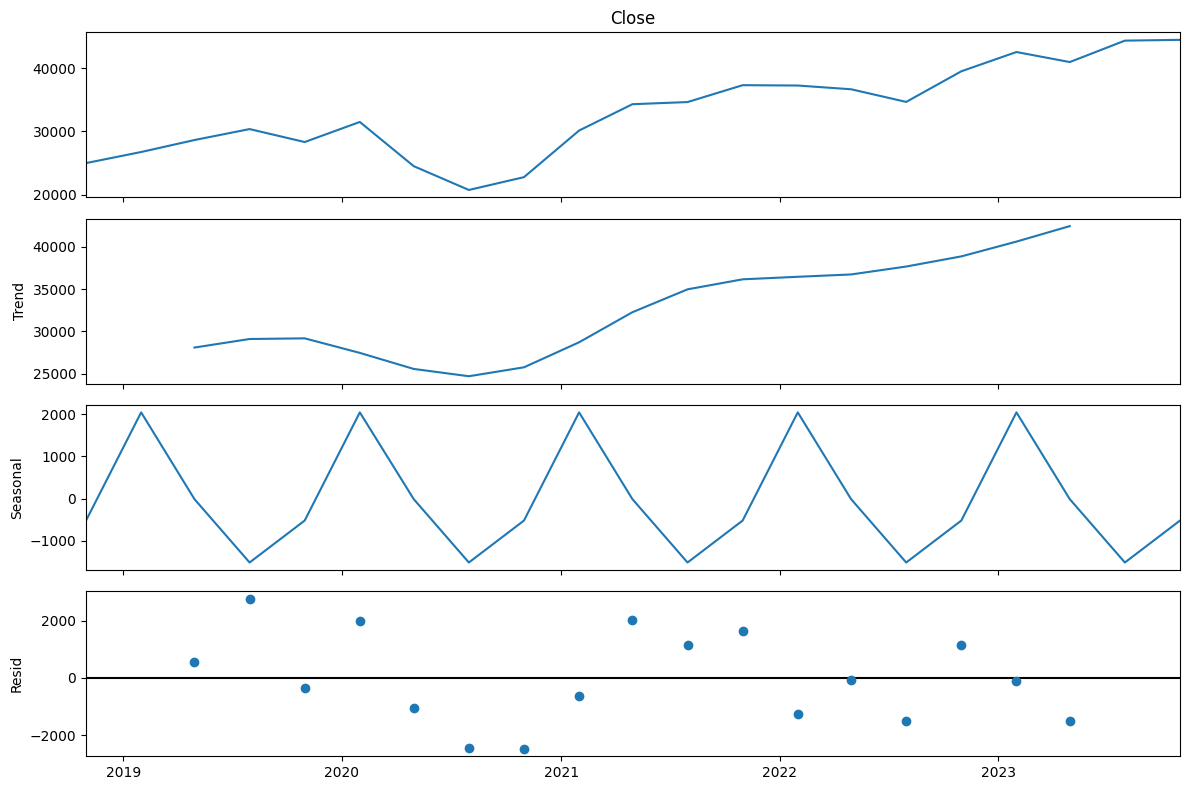

In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm

# Ticker symbol for Nifty 50 index
nifty_ticker = "^NSEBANK"

# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="5y")

# Resample the data on a 6-month basis to observe seasonality
six_monthly_data = data['Close'].resample('3M').mean().dropna()

# Seasonal decomposition
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(six_monthly_data, model='additive')  # Adjusted for 6-month data
fig = decomposition.plot()
plt.show()


[*********************100%%**********************]  1 of 1 completed


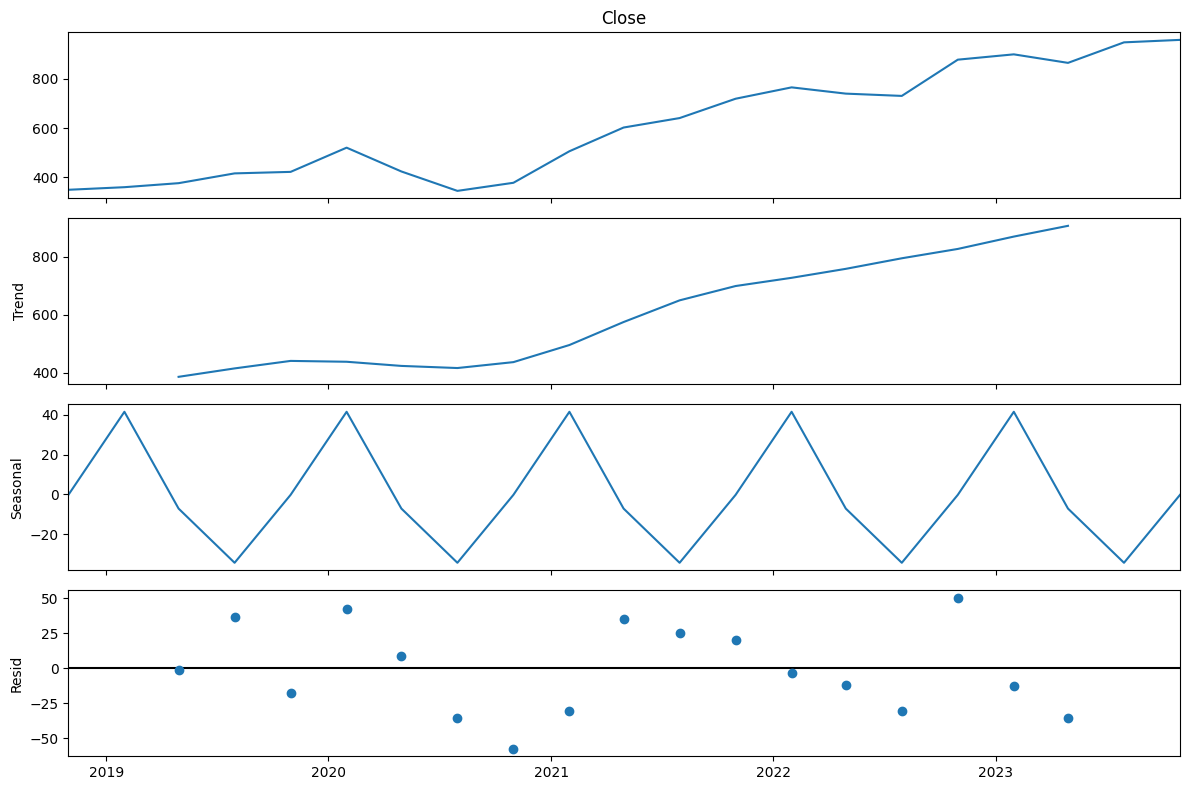

In [15]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm

# Ticker symbol for Nifty 50 index
nifty_ticker = "ICICIBANK.NS"

# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="5y")

# Resample the data on a 6-month basis to observe seasonality
six_monthly_data = data['Close'].resample('3M').mean().dropna()

# Seasonal decomposition
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(six_monthly_data, model='additive')  # Adjusted for 6-month data
fig = decomposition.plot()
plt.show()

[*********************100%%**********************]  1 of 1 completed


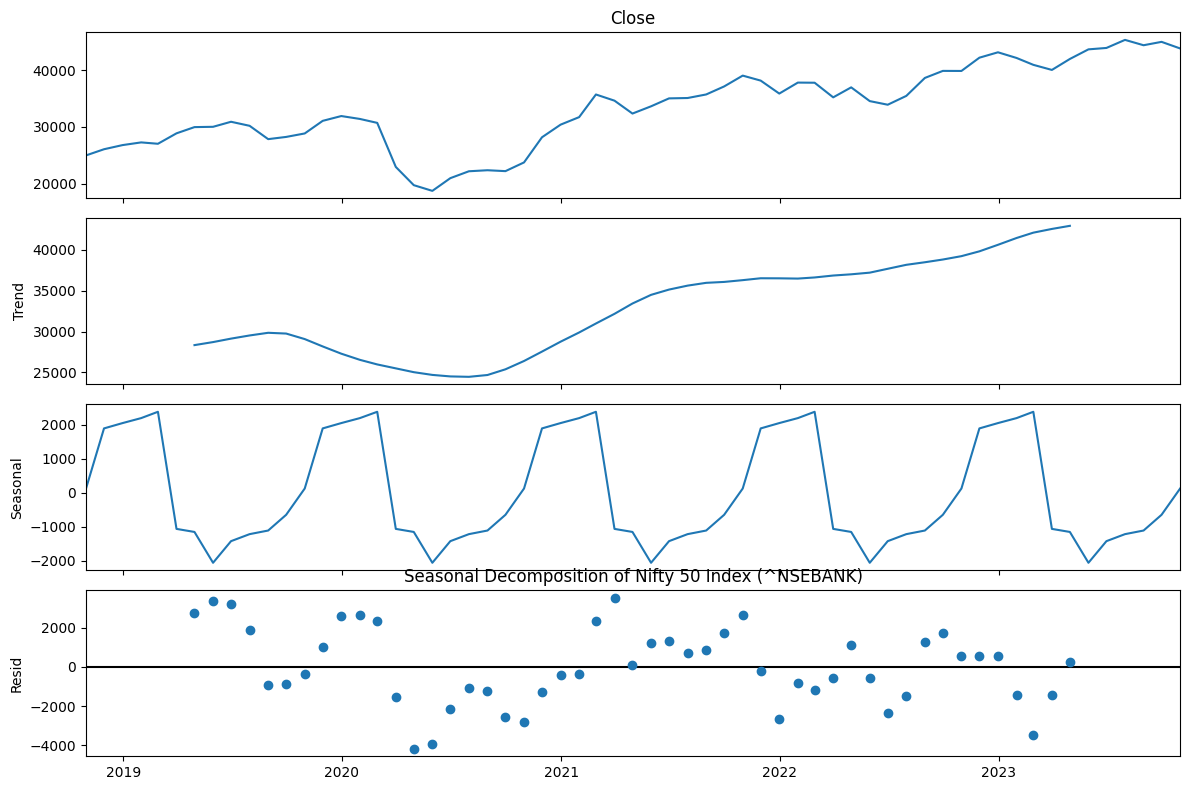

In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm

# Ticker symbol for Nifty 50 index
nifty_ticker = "^NSEBANK"

# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="5y")

# Resample the data on a 6-month basis to observe seasonality
six_monthly_data = data['Close'].resample('1M').mean().dropna()

# Seasonal decomposition
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(six_monthly_data, model='additive')  # Adjusted for 6-month data
fig = decomposition.plot()

# Add title with the ticker name
plt.title('Seasonal Decomposition of Nifty 50 Index (' + nifty_ticker + ')')

plt.show()


[*********************100%%**********************]  1 of 1 completed


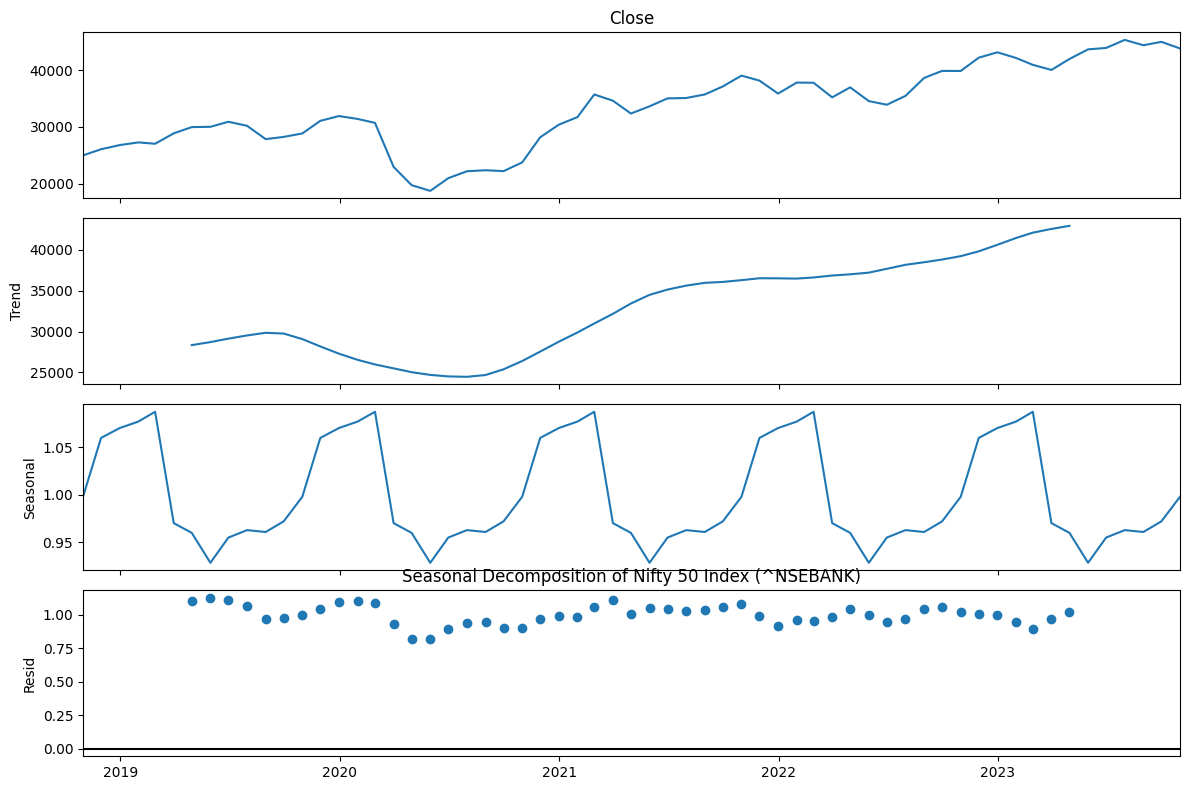

In [17]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm

# Ticker symbol for Nifty 50 index
nifty_ticker = "^NSEBANK"

# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="5y")

# Resample the data on a 6-month basis to observe seasonality
six_monthly_data = data['Close'].resample('1M').mean().dropna()

# Seasonal decomposition
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(six_monthly_data, model='multiplicative')  # Adjusted for 6-month data
fig = decomposition.plot()

# Add title with the ticker name
plt.title('Seasonal Decomposition of Nifty 50 Index (' + nifty_ticker + ')')

plt.show()

## Build and evaluate time series forecast

## Split time series data into training and test set

In [18]:
data = stock
train_len = 1100
train = data[0:train_len] # first 120 months as training set
test = data[train_len:]

In [19]:
print(train.shape)
print(test.shape)

(1100, 6)
(130, 6)


## Naive method

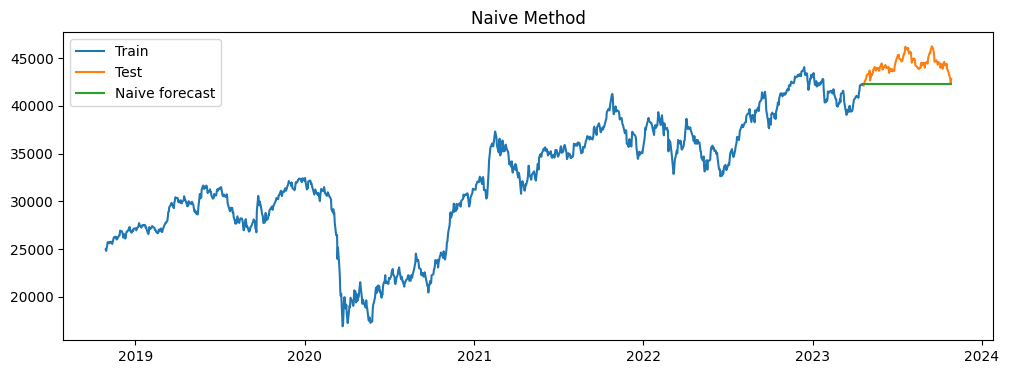

In [20]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Close'][train_len-1]
plt.figure(figsize=(12,4))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Close'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Close']-y_hat_naive['naive_forecast'])/test['Close'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,2223.04,4.61


## Simple average method

In [22]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Close'].mean()

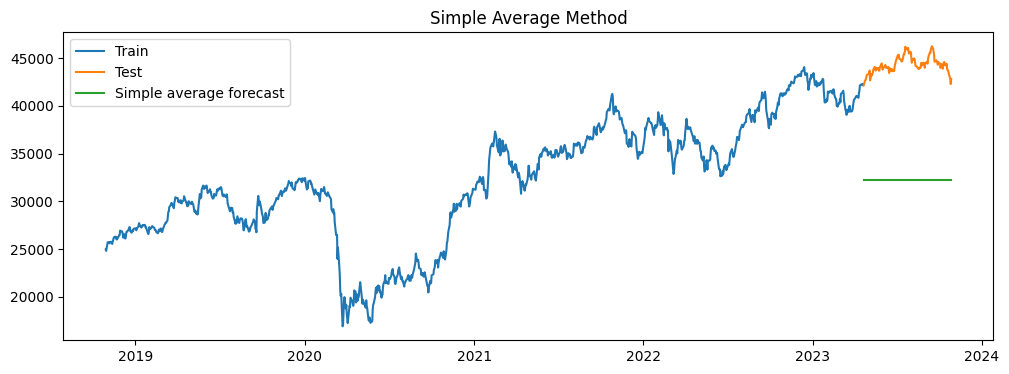

In [23]:
plt.figure(figsize=(12,4))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [24]:
rmse = np.sqrt(mean_squared_error(test['Close'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Close']-y_hat_avg['avg_forecast'])/test['Close'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,2223.04,4.61
0,Simple average method,12141.57,27.30


## Simple moving average method

In [25]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Close'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

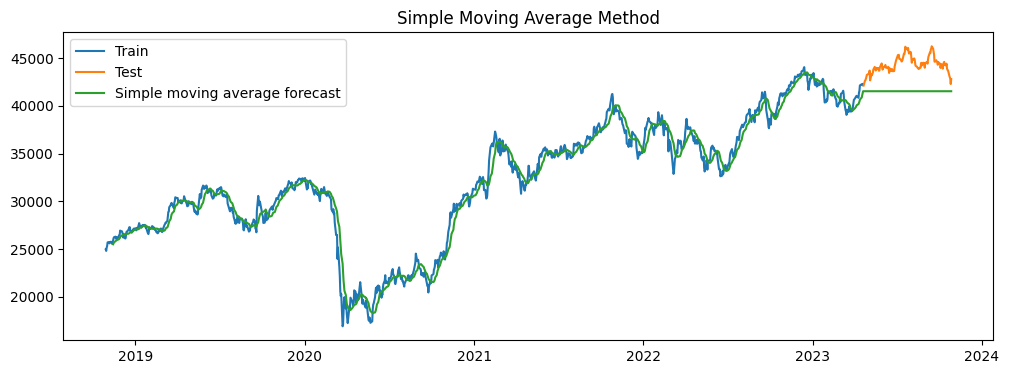

In [26]:
plt.figure(figsize=(12,4))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [27]:
rmse = np.sqrt(mean_squared_error(test['Close'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Close']-y_hat_sma['sma_forecast'][train_len:])/test['Close'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,2223.04,4.61
0,Simple average method,12141.57,27.30
0,Simple moving average forecast,2924.56,6.28


# Exponential smoothing methods

## Simple exponential smoothing

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


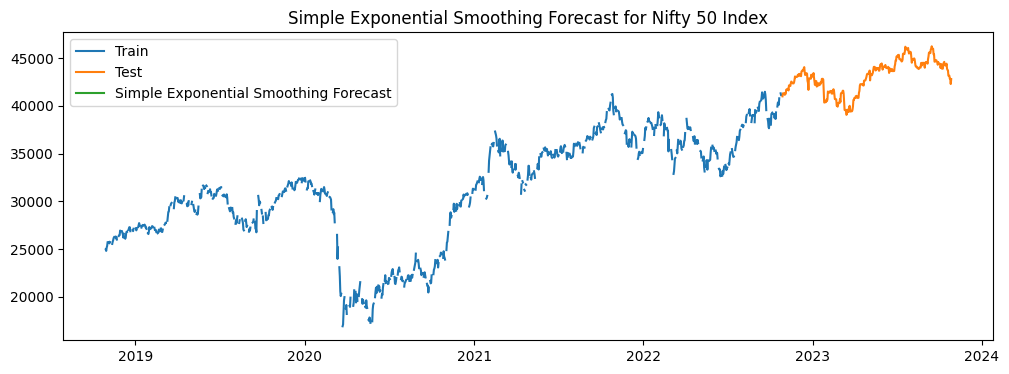

In [28]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Ticker symbol for Nifty 50 index
nifty_ticker = "^NSEBANK"

# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="5y")

# Ensure the date index has a valid frequency (daily in this case)
data = data['Close'].asfreq('D')

# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train = data[:train_size]
test = data[train_size:]

# Handle missing values in the test set (if any)
test = test.fillna(method='bfill')

# Simple exponential smoothing
model = SimpleExpSmoothing(train)
model_fit = model.fit()

# Forecast for the test set
y_hat_ses = model_fit.forecast(len(test))

# Plot the results
plt.figure(figsize=(12, 4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_ses, label='Simple Exponential Smoothing Forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Forecast for Nifty 50 Index')
plt.show()



[*********************100%%**********************]  1 of 1 completed


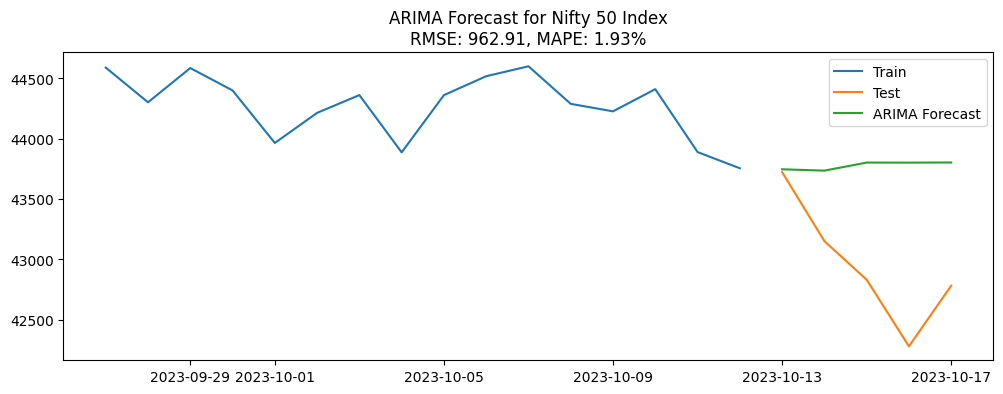

In [29]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Ticker symbol for Nifty 50 index
nifty_ticker ="^NSEBANK"

# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="1mo")

# Selecting only the 'Close' prices
close_prices = data['Close'].dropna()

# Ensure the date index has a valid frequency (daily in this case)
close_prices.index = pd.date_range(start=close_prices.index.min(), periods=len(close_prices), freq='D')

# Split the data into train and test sets
train_size = int(len(close_prices) * 0.8)
train = close_prices[:train_size]
test = close_prices[train_size:]

# ARIMA model
model = ARIMA(train, order=(5,1,0))  # Adjust order as needed
model_fit = model.fit()

# Forecast for the test set
pred = model_fit.get_prediction(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
y_hat_arima = pred.predicted_mean

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, y_hat_arima))

# Calculate MAPE
def calculate_mape(y_true, y_pred):
    nonzero_indices = y_true != 0
    mape_values = np.abs((y_true[nonzero_indices] - y_pred[nonzero_indices]) / y_true[nonzero_indices]) * 100
    mape_values[np.isnan(mape_values)] = 0  # Replace NaN with 0
    return np.mean(mape_values)

mape = calculate_mape(test, y_hat_arima)

# Plot the results
plt.figure(figsize=(12, 4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, y_hat_arima, label='ARIMA Forecast')
plt.legend(loc='best')
plt.title('ARIMA Forecast for Nifty 50 Index\nRMSE: {:.2f}, MAPE: {:.2f}%'.format(rmse, mape))
plt.show()


In [30]:
tempResults = pd.DataFrame({'Method':['ARIMA'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,2223.040000,4.610000
0,Simple average method,12141.570000,27.300000
0,Simple moving average forecast,2924.560000,6.280000
0,ARIMA,962.913917,1.930294


[*********************100%%**********************]  1 of 1 completed


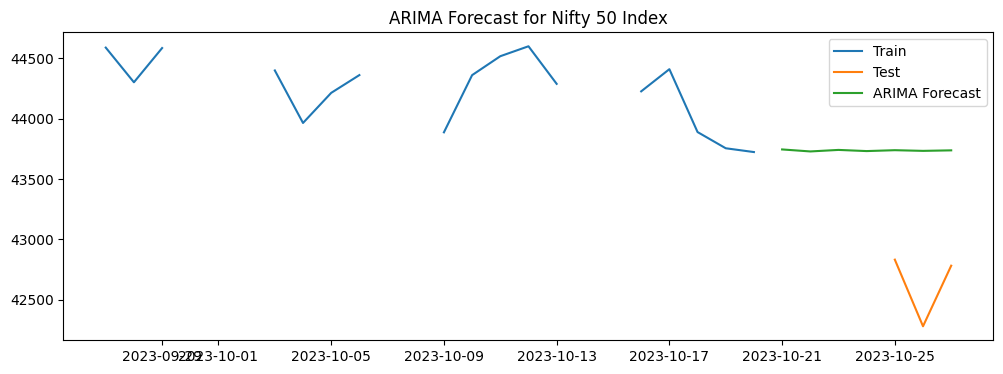

In [31]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Ticker symbol for the Nifty 50 index
nifty_ticker = "^NSEBANK"

# Get the historical Nifty 50 index data
nifty_data = yf.download(nifty_ticker, period="1mo")

# Ensure the date index has a valid frequency (daily in this case)
nifty_data = nifty_data['Close'].asfreq('D')

# Split the data into train and test sets
train_size = int(len(nifty_data) * 0.8)
train = nifty_data[:train_size]
test = nifty_data[train_size:]

# Fit the ARIMA model to the train set
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Forecast the data for the test set
y_hat = model_fit.forecast(len(test))

# Plot the results
plt.figure(figsize=(12, 4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat, label='ARIMA Forecast')
plt.legend(loc='best')
plt.title('ARIMA Forecast for Nifty 50 Index')
plt.show()



[*********************100%%**********************]  1 of 1 completed


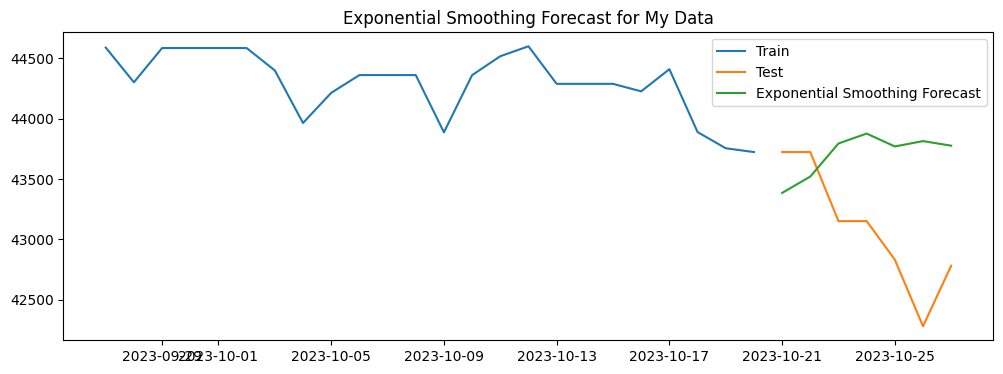

In [32]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the time series data
nifty_ticker = "^NSEBANK"

# Get the historical Nifty 50 index data
nifty_data = yf.download(nifty_ticker, period="1mo")

data = nifty_data['Close'].asfreq('D').fillna(method='ffill')



# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train = data[:train_size]
test = data[train_size:]

# Fit the Holt-Winters exponential smoothing model to the train set
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Forecast the future values of the time series
y_hat = model_fit.forecast(len(test))

# Plot the results
plt.figure(figsize=(12, 4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat, label='Exponential Smoothing Forecast')
plt.legend(loc='best')
plt.title('Exponential Smoothing Forecast for My Data')
plt.show()



In [33]:
rmse = np.sqrt(mean_squared_error(test, y_hat)).round(2)
mape = np.round(np.mean(np.abs(test-y_hat)/test)*100,2)

tempResults = pd.DataFrame({'Method':['Holtz Winter Exponential forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,2223.040000,4.610000
0,Simple average method,12141.570000,27.300000
0,Simple moving average forecast,2924.560000,6.280000
0,ARIMA,962.913917,1.930294
0,Holtz Winter Exponential forecast,871.260000,1.790000


from matplotlib import pyplot as plt
results['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results['MAPE'].plot(kind='hist', bins=20, title='MAPE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
results.groupby('Method').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results.plot(kind='scatter', x='RMSE', y='MAPE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results['MAPE'].plot(kind='line', figsize=(8, 4), title='MAPE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results['Method'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results, x='RMSE', y='Method', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results['Method'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results, x='MAPE', y='Method', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [34]:
# Load the time series data
nifty_ticker = "^NSEBANK"

# Get the historical Nifty 50 index data
nifty_data = yf.download(nifty_ticker, period="2mo")

data = nifty_data['Close'].asfreq('D').fillna(method='ffill')
final_model = ExponentialSmoothing(data, trend="add", seasonal='add', seasonal_periods=4).fit()
pred = final_model.forecast(20)
pred

[*********************100%%**********************]  1 of 1 completed


2023-10-28    42647.642759
2023-10-29    42596.462332
2023-10-30    42477.490023
2023-10-31    42446.059597
2023-11-01    42343.476340
2023-11-02    42292.295913
2023-11-03    42173.323603
2023-11-04    42141.893178
2023-11-05    42039.309921
2023-11-06    41988.129494
2023-11-07    41869.157184
2023-11-08    41837.726759
2023-11-09    41735.143502
2023-11-10    41683.963075
2023-11-11    41564.990765
2023-11-12    41533.560340
2023-11-13    41430.977083
2023-11-14    41379.796656
2023-11-15    41260.824346
2023-11-16    41229.393920
Freq: D, dtype: float64

<Axes: xlabel='Date'>

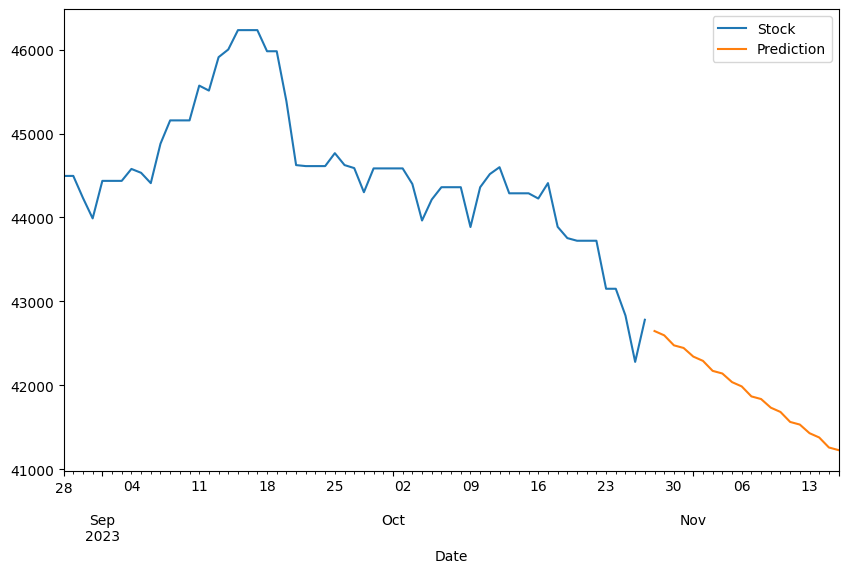

In [35]:
data.plot(legend= True, label='Stock', figsize=(10,6))
pred.plot(legend= True, label='Prediction')